In [1]:
# 드라이브 마운트(연동)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/딥러닝

/content/drive/MyDrive/Colab Notebooks/딥러닝


### 목표
- 패션 데이터를 가지고 활성화 함수, 최적화 함수를 변경시키면서 결과를 확인해보자

In [3]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
# 패션 데이터 불러오기
from tensorflow.keras.datasets import fashion_mnist
# 데이터 객체 생성
data = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [5]:
# 데이터 분할 - 인덱싱
X_train = data[0][0] # -> 데이터가 2차원이다!
X_test = data[1][0]
y_train = data[0][1]
y_test = data[1][1]

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# 3차원 (데이터개수, 행, 열)

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [7]:
# 데이터 확인
X_train
# 하나의 2차원 배열 -> 이미지 1장(x / y) -> 2차원 배열
# 이미지의 개수까지 포함하면 1차원이 추가돼서 3차원 배열

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [8]:
# 정답 데이터 확인하기
y_train
# 1차원의 배열 / 숫자로 값이 이뤄졌다.

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
# 정답의 고유값을 살펴보자 - 10개의 정답(다중 분류)
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

- 데이터 정리
  - 0 : 티셔츠
  - 1 : 트라우저(바지)
  - 2 : 단추가 없는 스웨터
  - 3 : 드레스
  - 4 : 코트
  - 5 : 샌들
  - 6 : 셔츠
  - 7 : 스니커즈
  - 8 : 가방
  - 9 : 앵클 부츠

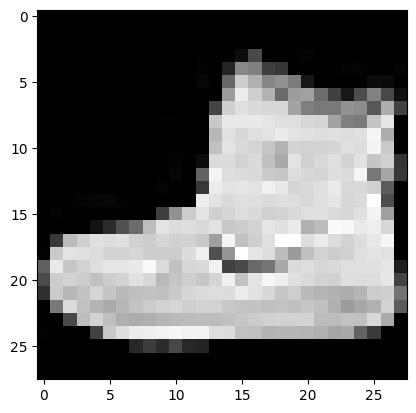

In [13]:
# 이미지 출력해보기
plt.imshow(X_train[0], cmap = 'gray')

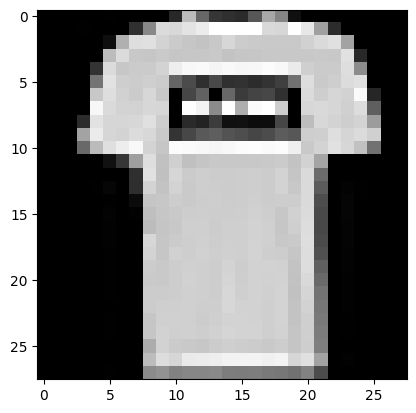

In [14]:
plt.imshow(X_train[1], cmap = 'gray')

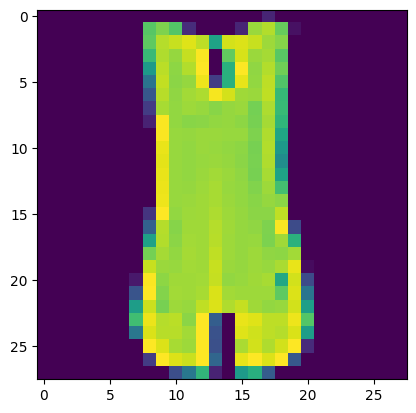

In [22]:
plt.imshow(X_train[4])

In [23]:
y_train[4]

0

In [24]:
y_train[10000]

8

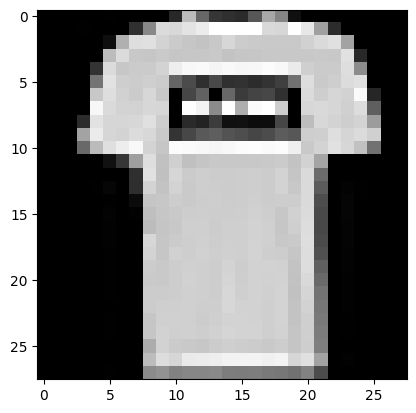

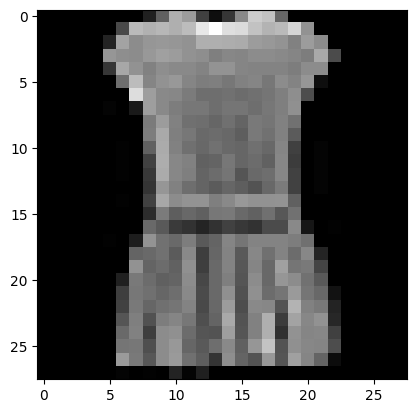

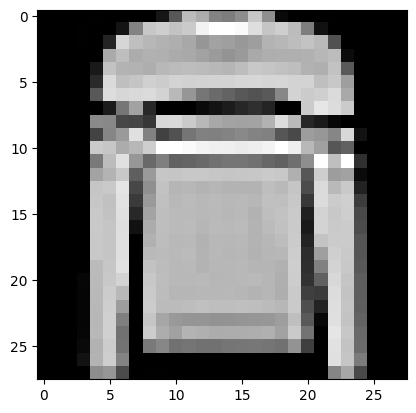

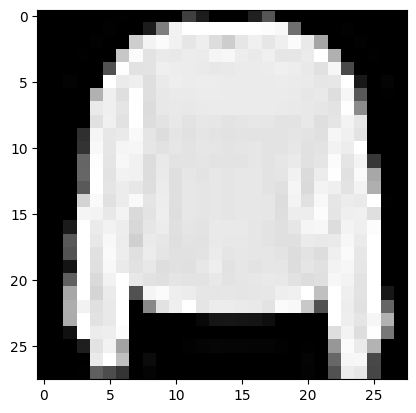

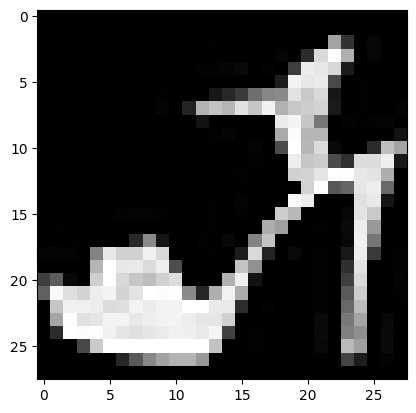

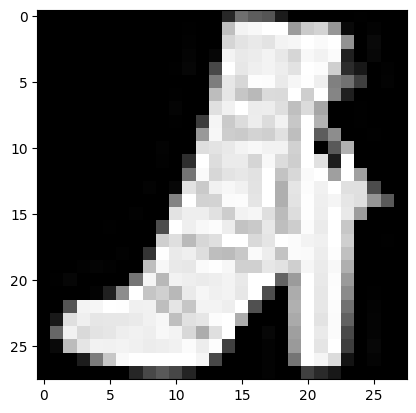

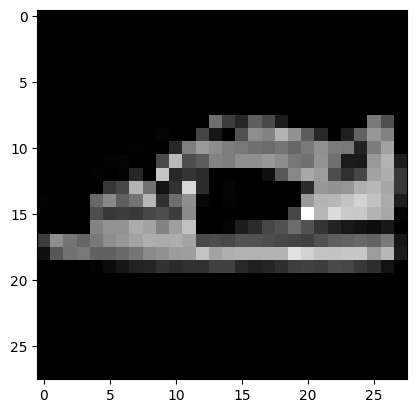

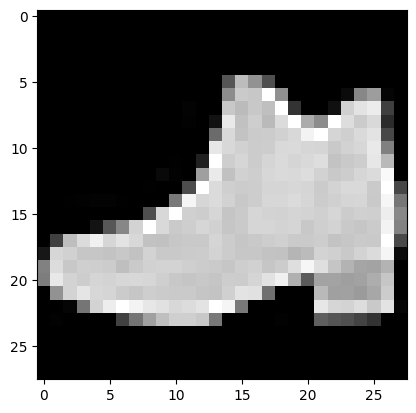

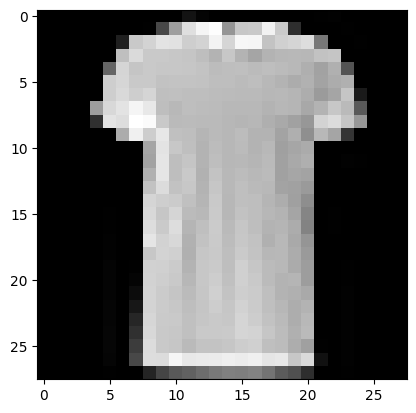

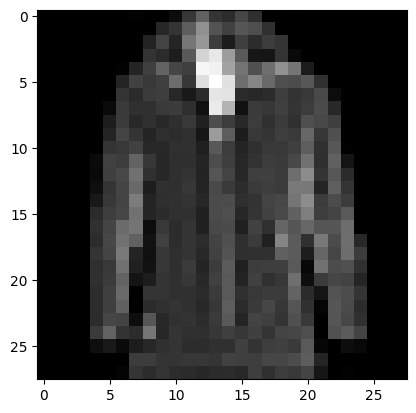

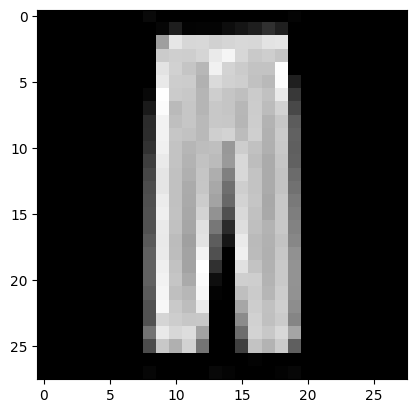

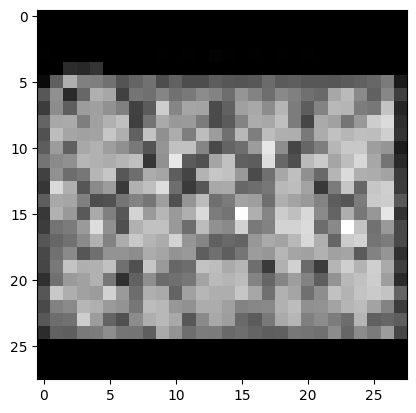

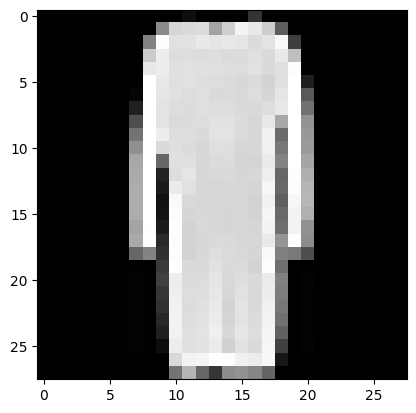

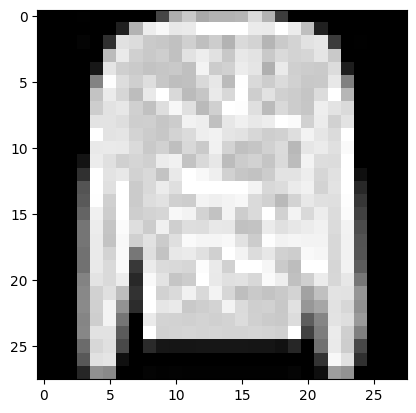

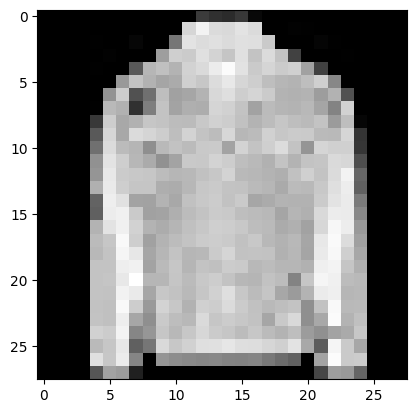

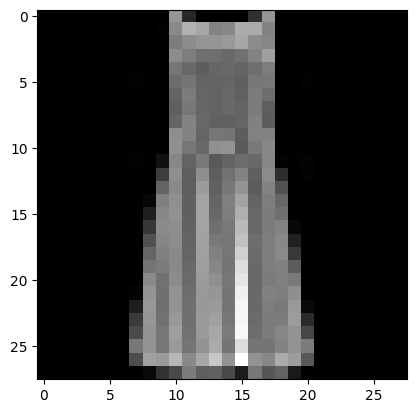

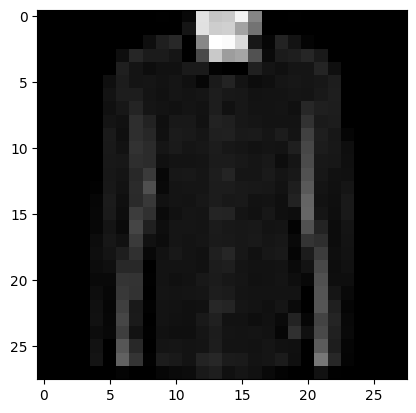

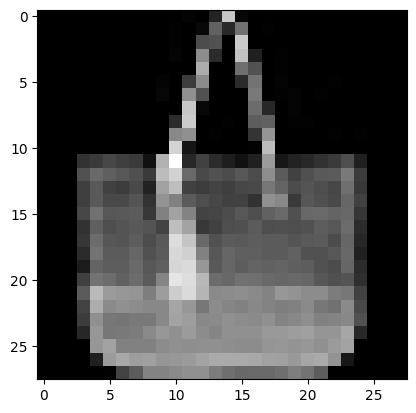

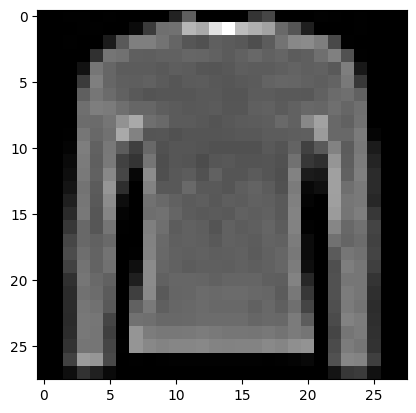

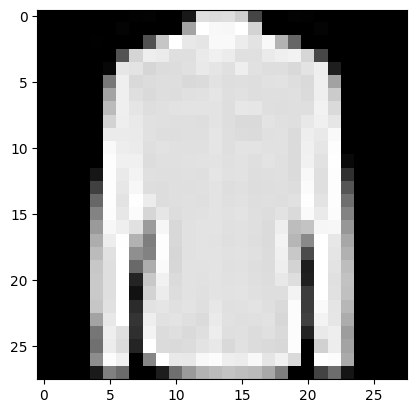

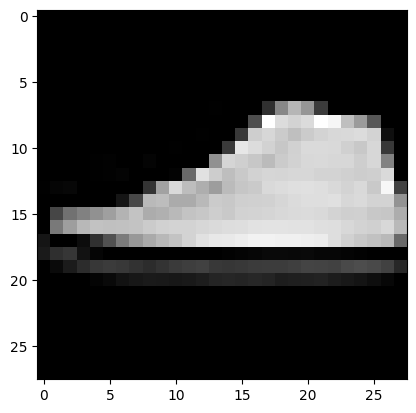

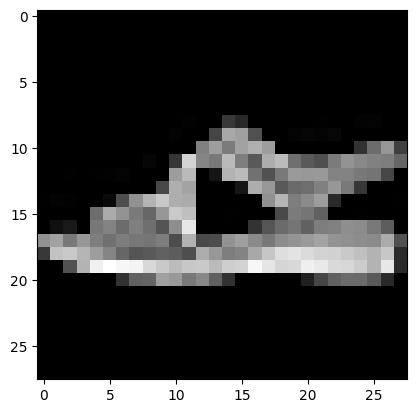

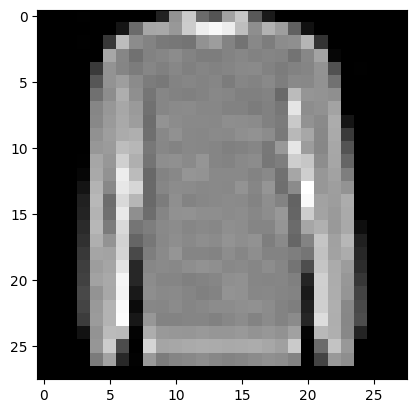

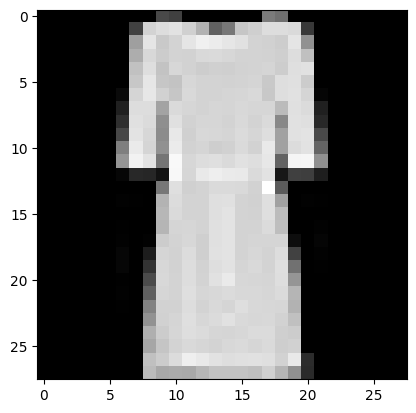

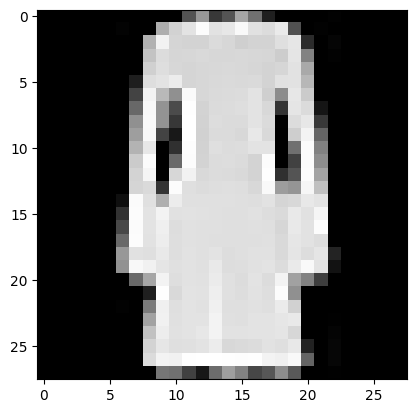

In [25]:
# 반복문을 통해서 여러 이미지를 뽑아내보자
for i in range(1, 50, 2):
  plt.imshow(X_train[i], cmap = 'gray')
  plt.show()

In [26]:
y_train[23]

8

### 이미지 전처리
- MLP(Multi-Layer Perceptron;다층 퍼셉트론)으로 신경망을 구현할 경우, 이미지를 1차원으로 펴서 넣어줘야 한다.
- 1차원으로 펴진 이미지의 픽셀은 각각 뉴런에 들어가서 학습이 진행된다.

In [ ]:
# 이미지를 1차원으로 바꿔주는 방법 - 2가지
# 1-1. reshape : 함수를 이용해서 직접 형태를 바꿔주는 방법 (numpy - 배열의 형태를 바꿔줌)
# 1-2. Flatten : 신경망에 층을 추가해서 1차원으로 변형시켜주는 방법

In [27]:
# 1-1. reshape : 손으로 직접 데이터를 펴주는 방법(실습만 해보자!)
X_train.shape

(60000, 28, 28)

In [29]:
X_train_reshape = X_train.reshape(60000, 28**2)
# X_train_reshape = X_train.reshape(60000, -1) -> -1 : 알아서 계산해주세요
X_test_reshape = X_test.reshape(10000, 28*28)

In [30]:
X_train_reshape.shape, X_test_reshape.shape

((60000, 784), (10000, 784))

In [ ]:
# 정답 데이터 전처리
# 정답 데이터 종류 : 10개 (다중분류)
# 다중 분류를 진행할 때 정답데이터 -> 원핫인코딩
# 원핫인코딩 진행방법
# 1. pd.get_dummies() - pandas에서 제공
# 2. to_categorical() - tensorflow에서 제공
# to_categorical 사용해보기

In [31]:
# to_categorical import
from tensorflow.keras.utils import to_categorical

# 정답 데이터 원핫인코딩 진행
y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)

### 활성화 함수 / 최적화 함수 별로 성능 비교
1. 중간층 활성화 함수 : sigmoid / 최적화 함수 : SGD
2. 중간층 활성화 함수 : sigmoid / 최적화 함수 : Adam
3. 중간층 활성화 함수 : relu / 최적화 함수 : Adam
4. 중간층 활성화 함수 : tanh / 최적화 함수 : SGD


In [37]:
# 신경망을 구현하기 위한 재료 import
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [33]:
# 최적화 함수 하이퍼 파라미터 변경을 위해 optimizer import
from tensorflow.keras.optimizers import SGD, Adam

In [34]:
# 모델 생성 함수 정의
# 활성화 함수 / 최적화 함수는 매개변수 값으로 연결
# acti = 활성화 함수, opti = 최적화 함수
def create_model(acti, opti):
  model = Sequential()

  # 입력층 구성 - Flatten : 데이터를 1차원으로 펴줌
  model.add(Flatten(input_shape=(28, 28)))

  # MLP층 쌓아주기
  model.add(Dense(units=200, activation = acti))
  model.add(Dense(units=100, activation = acti))
  model.add(Dense(units=50, activation = acti))

  # 출력층 쌓기
  model.add(Dense(units=10, activation = 'softmax'))

  # 모델 컴파일
  model.compile(optimizer = opti,
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

  return model

In [38]:
# fit 함수 정의
# 모델명만 넣어주면 학습을 진행하는 코드를 작성
def fit_model(estimator) :
  h = estimator.fit(X_train, y_train_oh,
                    epochs = 30,
                    validation_split = 0.2,  # 교차검증_비율로 쪼개서 학습데이터로 사용
                    batch_size = 64)
  return h

In [39]:
# 1. sigmoid + SGD
model1 = create_model(acti = 'sigmoid', opti = SGD(learning_rate = 0.01))
h1 = fit_model(model1)

Epoch 1/30
750/750 [==============================] - 6s 7ms/step - loss: 2.2107 - accuracy: 0.3937 - val_loss: 2.1046 - val_accuracy: 0.6038
Epoch 2/30
750/750 [==============================] - 6s 8ms/step - loss: 1.9322 - accuracy: 0.5614 - val_loss: 1.7346 - val_accuracy: 0.5670
Epoch 3/30
750/750 [==============================] - 8s 10ms/step - loss: 1.5517 - accuracy: 0.5896 - val_loss: 1.3867 - val_accuracy: 0.6199
Epoch 4/30
750/750 [==============================] - 5s 6ms/step - loss: 1.2636 - accuracy: 0.6272 - val_loss: 1.1534 - val_accuracy: 0.6653
Epoch 5/30
750/750 [==============================] - 7s 9ms/step - loss: 1.0729 - accuracy: 0.6692 - val_loss: 0.9974 - val_accuracy: 0.6747
Epoch 6/30
750/750 [==============================] - 5s 6ms/step - loss: 0.9429 - accuracy: 0.6895 - val_loss: 0.8877 - val_accuracy: 0.6929
Epoch 7/30
750/750 [==============================] - 5s 6ms/step - loss: 0.8515 - accuracy: 0.7094 - val_loss: 0.8118 - val_accuracy: 0.7322
Epoch

In [40]:
# 2. sigmoid + Adam
model2 = create_model(acti = 'sigmoid', opti = Adam(learning_rate = 0.001))
h2 = fit_model(model2)
# 어느 시점부터 학습이 제대로 안 되고 있다 (정확도가 안 올라감)

Epoch 1/30
750/750 [==============================] - 7s 8ms/step - loss: 1.0703 - accuracy: 0.6398 - val_loss: 0.8235 - val_accuracy: 0.7001
Epoch 2/30
750/750 [==============================] - 6s 8ms/step - loss: 0.7444 - accuracy: 0.7185 - val_loss: 0.7197 - val_accuracy: 0.6922
Epoch 3/30
750/750 [==============================] - 7s 9ms/step - loss: 0.7248 - accuracy: 0.7206 - val_loss: 0.7202 - val_accuracy: 0.7270
Epoch 4/30
750/750 [==============================] - 5s 7ms/step - loss: 0.7126 - accuracy: 0.7264 - val_loss: 0.7236 - val_accuracy: 0.7203
Epoch 5/30
750/750 [==============================] - 8s 10ms/step - loss: 0.6830 - accuracy: 0.7405 - val_loss: 0.6305 - val_accuracy: 0.7524
Epoch 6/30
750/750 [==============================] - 5s 7ms/step - loss: 0.6616 - accuracy: 0.7441 - val_loss: 0.6667 - val_accuracy: 0.7347
Epoch 7/30
750/750 [==============================] - 7s 9ms/step - loss: 0.6686 - accuracy: 0.7427 - val_loss: 0.6606 - val_accuracy: 0.7572
Epoch

In [44]:
# 3. relu + Adam
model3 = create_model(acti = 'relu', opti = Adam(learning_rate = 0.001))
h3 = fit_model(model3)

Epoch 1/30
750/750 [==============================] - 6s 7ms/step - loss: 2.0462 - accuracy: 0.7355 - val_loss: 0.6710 - val_accuracy: 0.7942
Epoch 2/30
750/750 [==============================] - 8s 10ms/step - loss: 0.5395 - accuracy: 0.8211 - val_loss: 0.5003 - val_accuracy: 0.8319
Epoch 3/30
750/750 [==============================] - 5s 7ms/step - loss: 0.4541 - accuracy: 0.8411 - val_loss: 0.4612 - val_accuracy: 0.8388
Epoch 4/30
750/750 [==============================] - 7s 9ms/step - loss: 0.4160 - accuracy: 0.8527 - val_loss: 0.4202 - val_accuracy: 0.8512
Epoch 5/30
750/750 [==============================] - 6s 8ms/step - loss: 0.3946 - accuracy: 0.8593 - val_loss: 0.3990 - val_accuracy: 0.8595
Epoch 6/30
750/750 [==============================] - 5s 7ms/step - loss: 0.3799 - accuracy: 0.8632 - val_loss: 0.4408 - val_accuracy: 0.8508
Epoch 7/30
750/750 [==============================] - 9s 12ms/step - loss: 0.3618 - accuracy: 0.8698 - val_loss: 0.4609 - val_accuracy: 0.8415
Epoc

In [42]:
# 4. tanh + SGD
model4 = create_model(acti = 'tanh', opti = SGD(learning_rate = 0.01))
h4 = fit_model(model4)

Epoch 1/30
750/750 [==============================] - 7s 9ms/step - loss: 1.0054 - accuracy: 0.6673 - val_loss: 0.8282 - val_accuracy: 0.6968
Epoch 2/30
750/750 [==============================] - 5s 6ms/step - loss: 0.7863 - accuracy: 0.7107 - val_loss: 0.7661 - val_accuracy: 0.7028
Epoch 3/30
750/750 [==============================] - 6s 8ms/step - loss: 0.7744 - accuracy: 0.7105 - val_loss: 0.7780 - val_accuracy: 0.7151
Epoch 4/30
750/750 [==============================] - 6s 7ms/step - loss: 0.8071 - accuracy: 0.6909 - val_loss: 0.8300 - val_accuracy: 0.6782
Epoch 5/30
750/750 [==============================] - 5s 7ms/step - loss: 0.8151 - accuracy: 0.6873 - val_loss: 0.8130 - val_accuracy: 0.7116
Epoch 6/30
750/750 [==============================] - 7s 9ms/step - loss: 0.8371 - accuracy: 0.6742 - val_loss: 0.8983 - val_accuracy: 0.6387
Epoch 7/30
750/750 [==============================] - 5s 7ms/step - loss: 0.8715 - accuracy: 0.6572 - val_loss: 0.7694 - val_accuracy: 0.6805
Epoch 

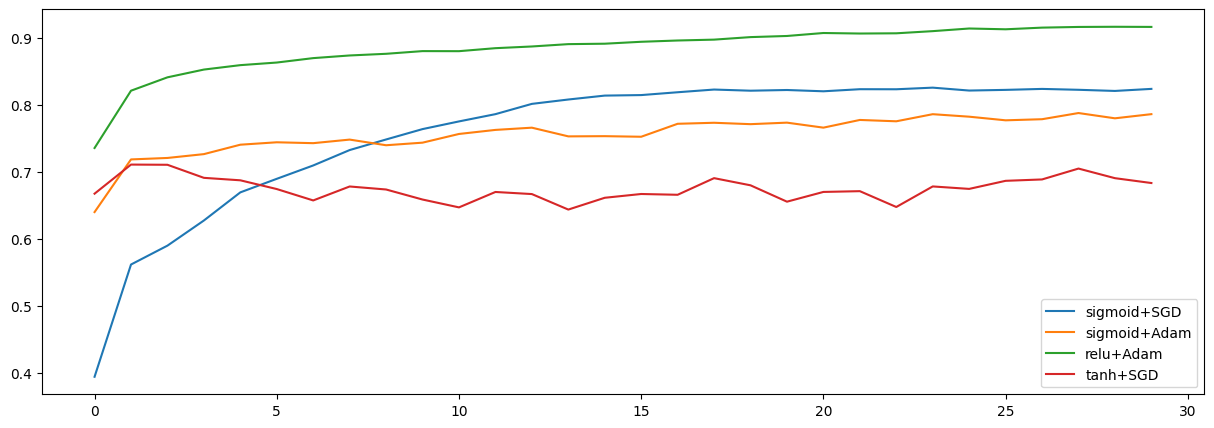

In [45]:
# 4종류의 모델 학습 시각화
plt.figure(figsize = (15,5))

# model1
plt.plot(h1.history['accuracy'], label = 'sigmoid+SGD')

# model2
plt.plot(h2.history['accuracy'], label = 'sigmoid+Adam')

# model3
plt.plot(h3.history['accuracy'], label = 'relu+Adam')

# model4
plt.plot(h4.history['accuracy'], label = 'tanh+SGD')

plt.legend()
plt.show()